In [ ]:
import torch
import torchvision
from torchvision import transforms

In [ ]:
transform=transforms.Compose([transforms.ToTensor()])

In [ ]:
training_data=torchvision.datasets.CIFAR10(root='/content/data',train=True,download=True,transform=transform)
testing_data=torchvision.datasets.CIFAR10(root='/content/data',train=False,download=True,transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(training_data)

50000

In [ ]:
len(testing_data)

10000

In [ ]:
classes={0:'plane',1:'car',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [ ]:
training_data[0][0].shape

torch.Size([3, 32, 32])

# creating dataloader

In [ ]:
train_loader=torch.utils.data.DataLoader(training_data,batch_size=32,shuffle=True)
test_loader=torch.utils.data.DataLoader(testing_data,batch_size=32,shuffle=True)

## plotting some sample images

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sample_data=iter(train_loader)

In [ ]:
images,labels=next(sample_data)

In [ ]:
labels

tensor([7, 8, 6, 6, 7, 4, 2, 5, 9, 4, 9, 0, 3, 7, 9, 0, 8, 1, 8, 6, 4, 2, 0, 6,
        0, 3, 9, 2, 2, 6, 7, 5])

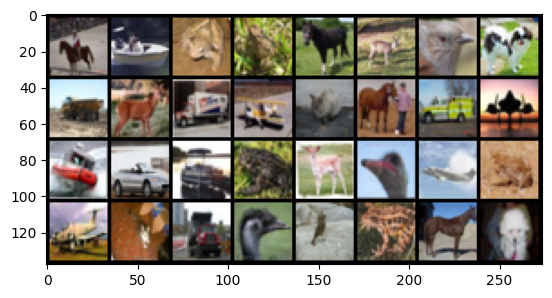

In [ ]:
def imshow(img):
  img_arr=img.numpy()
  plt.imshow(np.transpose(img_arr,(1,2,0)))
  plt.show()
imshow(torchvision.utils.make_grid(images))



In [ ]:
labels

tensor([7, 8, 6, 6, 7, 4, 2, 5, 9, 4, 9, 0, 3, 7, 9, 0, 8, 1, 8, 6, 4, 2, 0, 6,
        0, 3, 9, 2, 2, 6, 7, 5])

## convolutional neural network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class MyFirstCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(in_channels=6, out_channels= 16,kernel_size=5, stride=1, padding=0)

    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,56)
    self.fc3=nn.Linear(56,10)

  def forward(self,x):
    x1=self.pool(F.relu(self.conv1(x)))
    x2=self.pool(F.relu(self.conv2(x1)))
    x3=torch.flatten(x2,1)
    x4=F.relu(self.fc1(x3))
    x5=F.relu(self.fc2(x4))
    x6=self.fc3(x5)
    return x6

In [ ]:
class MyFirstCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(in_channels=6, out_channels= 16,kernel_size=5, stride=1, padding=0)

    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,56)
    self.fc3=nn.Linear(56,10)

  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(x)
    x=self.pool(x)
    x=self.conv2(x)
    x=F.relu(x)
    x=self.pool(x)
    x=torch.flatten(x,1)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.fc2(x)
    x=F.relu(x)
    x=self.fc3(x)
    return x

In [ ]:
model= MyFirstCNN()
model=model.to('cuda')

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
print(model)

MyFirstCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=56, bias=True)
  (fc3): Linear(in_features=56, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.001)

#Training process

In [ ]:
for epoch in range(0,20):
  total_loss=0
  for images,labels in train_loader:
    images = images.to('cuda')
    labels = labels.to('cuda')
    optimizer.zero_grad()
    output=model(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    total_loss=total_loss+loss.item()
  print(f"for epoch {epoch} the loss is {total_loss}")

for epoch 0 the loss is 3601.691960811615
for epoch 1 the loss is 3600.4778921604156
for epoch 2 the loss is 3599.5387184619904
for epoch 3 the loss is 3598.777455329895
for epoch 4 the loss is 3598.099022626877
for epoch 5 the loss is 3597.390879392624
for epoch 6 the loss is 3596.5493841171265
for epoch 7 the loss is 3595.4391038417816
for epoch 8 the loss is 3593.861125946045
for epoch 9 the loss is 3591.3320002555847
for epoch 10 the loss is 3587.2412109375
for epoch 11 the loss is 3580.143722295761
for epoch 12 the loss is 3566.2355468273163
for epoch 13 the loss is 3532.814213037491
for epoch 14 the loss is 3439.068722009659
for epoch 15 the loss is 3289.5648369789124
for epoch 16 the loss is 3192.806758284569
for epoch 17 the loss is 3141.342635512352
for epoch 18 the loss is 3102.929556965828
for epoch 19 the loss is 3067.2414833307266


## model evaluation

In [ ]:
correct=0
total=0
model.eval()
with torch.no_grad():
  for images,labels in test_loader:
    images = images.to('cuda')
    labels = labels.to('cuda')
    test_output=model(images)
    predicted=torch.argmax(test_output,dim=1)
    total=total+labels.size(0)
    correct=correct + (predicted==labels).sum().item()

In [ ]:
print(f"the accuracy of the model is {correct/total*100}")

the accuracy of the model is 29.17
